<a href="https://colab.research.google.com/github/Rishi8089/Credit_Scoring_Model/blob/main/creditscoremodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-559936078.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-559936078.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

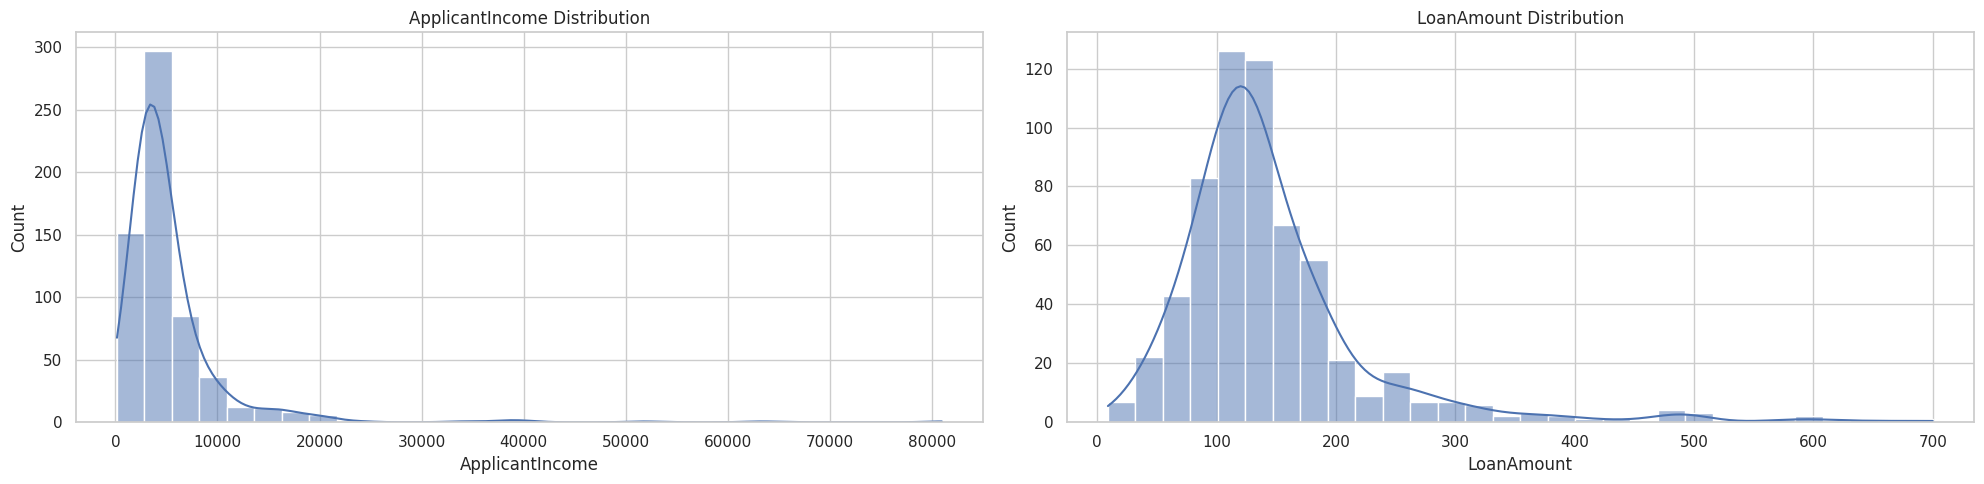

Logistic Regression Accuracy: 0.7805
Logistic Regression Precision: 0.7573
Logistic Regression Recall: 0.9750
Logistic Regression F1-score: 0.8525
Decision Tree Accuracy: 0.7398
Decision Tree Precision: 0.7927
Decision Tree Recall: 0.8125
Decision Tree F1-score: 0.8025
Random Forest Accuracy: 0.7805
Random Forest Precision: 0.7789
Random Forest Recall: 0.9250
Random Forest F1-score: 0.8457


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/train.csv')

# Handle missing values
df.fillna({'LoanAmount':df['LoanAmount'].median()}, inplace=True)
df.fillna({'Credit_History':df['Credit_History'].mode()[0]}, inplace=True)
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[col].fillna(df[col].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

# Feature engineering
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['LoanAmount_per_Term'] = df['LoanAmount'] / df['Loan_Amount_Term']
df['LoanAmount_per_Term'] = df['LoanAmount_per_Term'].replace([float('inf'), -float('inf')], 0)
df['DebtToIncomeRatio'] = df['LoanAmount'] / df['TotalIncome']
df['DebtToIncomeRatio'] = df['DebtToIncomeRatio'].replace([float('inf'), -float('inf')], 0).fillna(0)
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents'] = pd.to_numeric(df['Dependents'])

# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Loan_ID')
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Visualize distributions
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(df['ApplicantIncome'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('ApplicantIncome Distribution')
sns.histplot(df['LoanAmount'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('LoanAmount Distribution')
plt.tight_layout()
plt.show()

# Split data
X = df.drop(['Loan_ID', 'Loan_Status_Y'], axis=1)
y = df['Loan_Status_Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000))
])
log_reg_pipeline.fit(X_train, y_train)
y_pred_lr = log_reg_pipeline.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Logistic Regression Recall: {recall_lr:.4f}")
print(f"Logistic Regression F1-score: {f1_lr:.4f}")

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")
print(f"Decision Tree F1-score: {f1_dt:.4f}")

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-score: {f1_rf:.4f}")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
